<a href="https://colab.research.google.com/github/stancsz/notebook-scripts/blob/main/blur_photo_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python-headless

Saving Photo on 2023-12-18 at 1.00 PM.jpg to Photo on 2023-12-18 at 1.00 PM (1).jpg
Original Image:


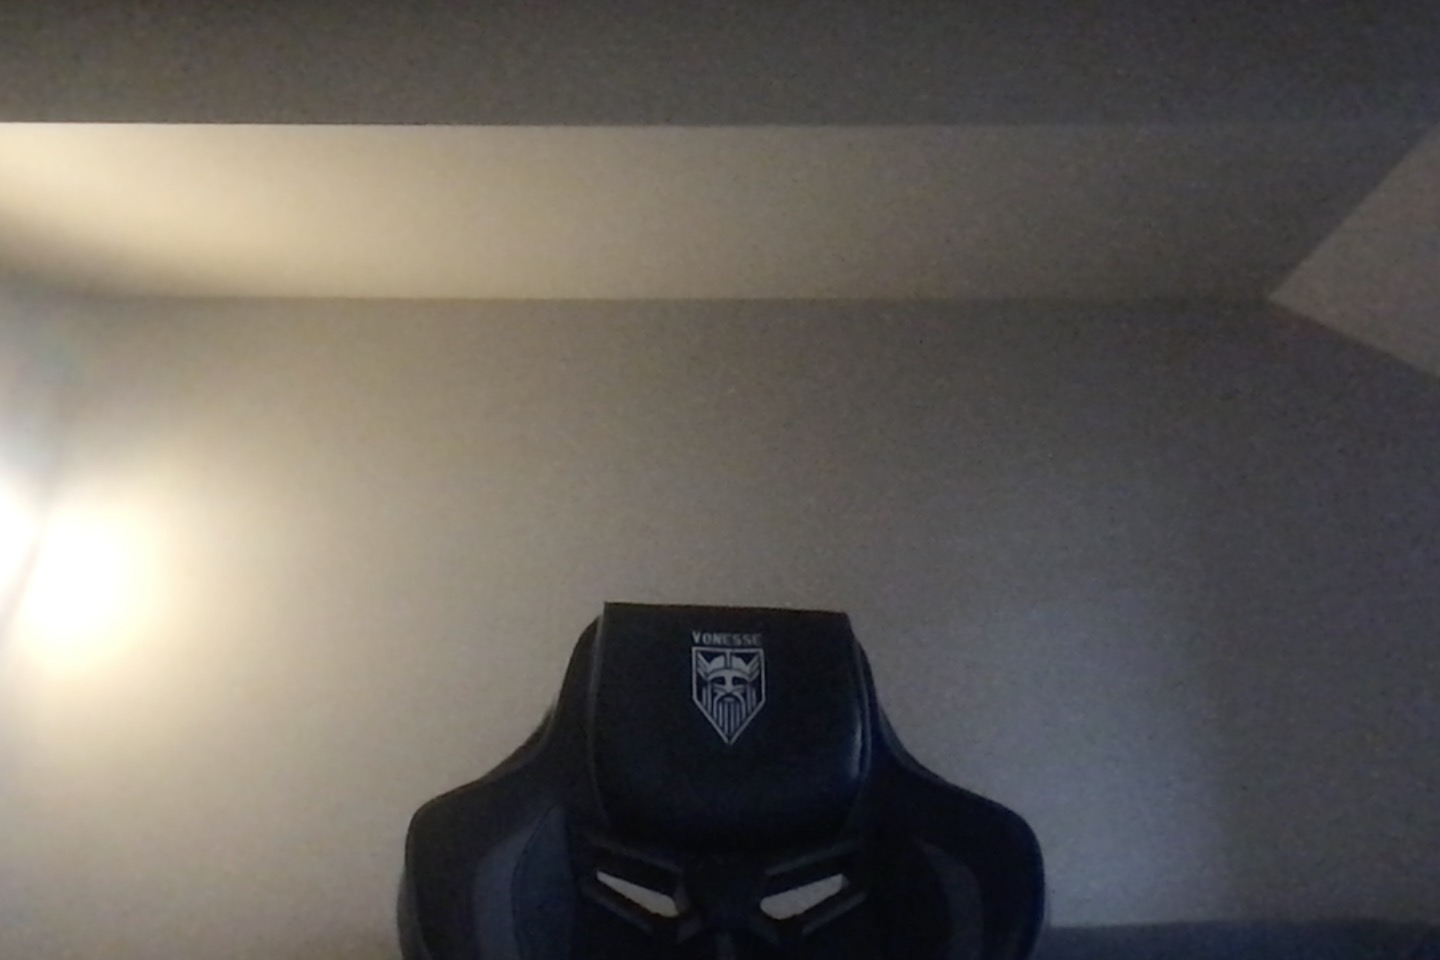

Adjust the blur amount using the slider:


IntSlider(value=1, continuous_update=False, description='Blur amount:', max=49, min=1, step=2)

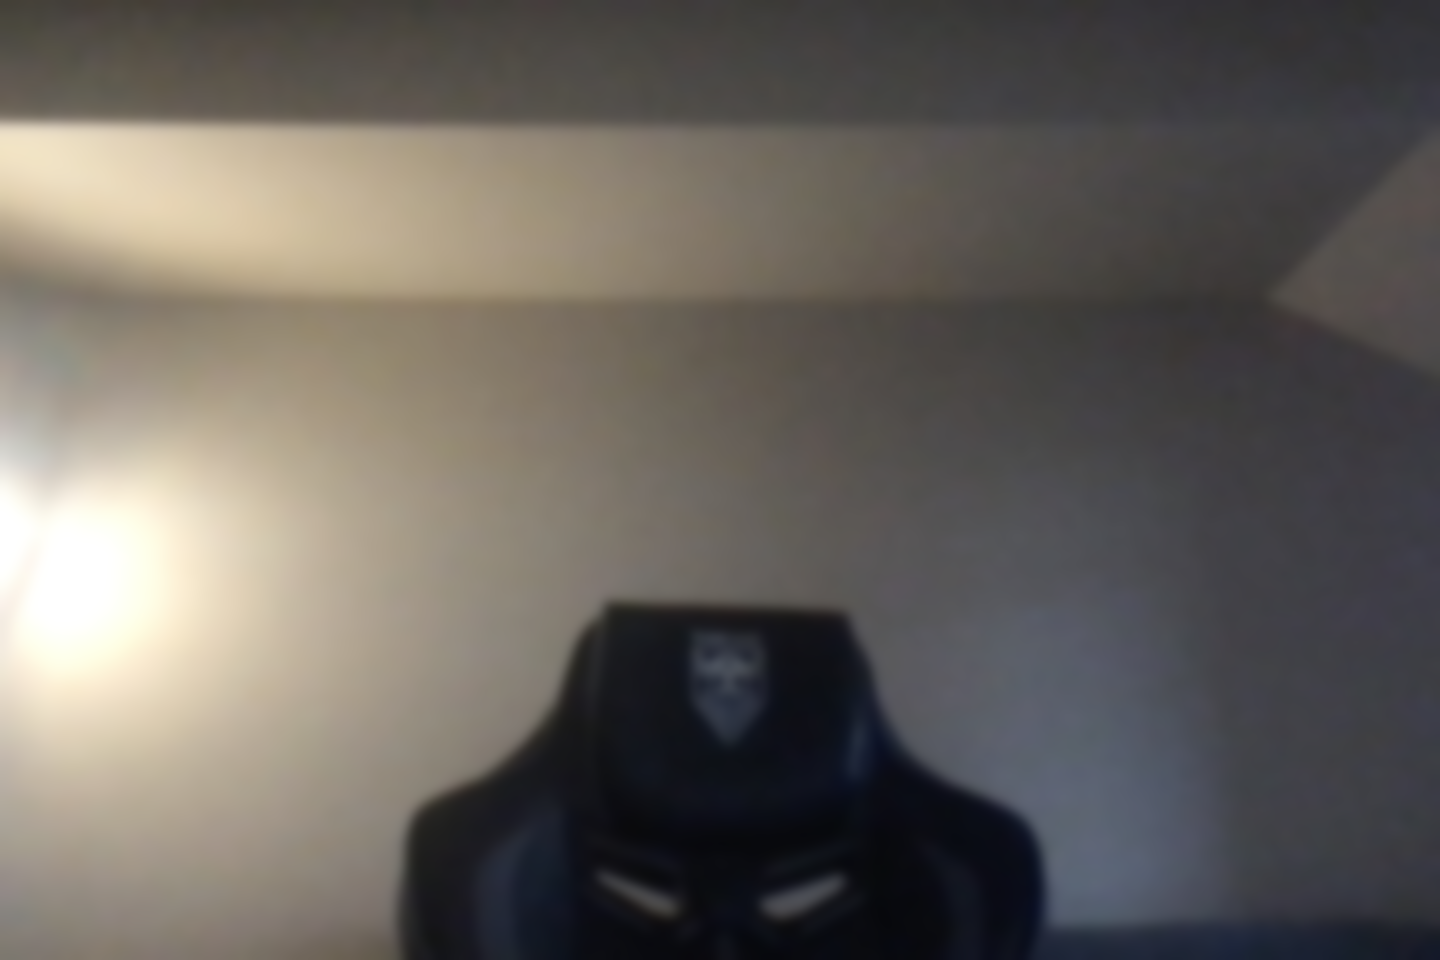

In [3]:
from google.colab import files
from ipywidgets import widgets, interact
from IPython.display import display, Image
import cv2
import numpy as np
from io import BytesIO
from PIL import Image as PILImage

# Function to upload an image
def upload_image():
    uploaded = files.upload()
    for name, data in uploaded.items():
        return PILImage.open(BytesIO(data))

# Function to apply Gaussian Blur to an image
def apply_gaussian_blur(image, blur_amount):
    # Convert PIL Image to numpy array
    image_np = np.array(image)
    # Convert RGB to BGR for OpenCV
    image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
    blurred_image_np = cv2.GaussianBlur(image_np, (blur_amount, blur_amount), 0)
    # Convert BGR back to RGB
    blurred_image_np = cv2.cvtColor(blurred_image_np, cv2.COLOR_BGR2RGB)
    # Convert numpy array back to PIL Image
    blurred_image = PILImage.fromarray(blurred_image_np)
    return blurred_image

# Upload the image
image = upload_image()

# Function to handle blur amount change
def on_blur_amount_change(change):
    blur_amount = change.new
    if blur_amount % 2 == 0: blur_amount += 1  # Ensure blur_amount is odd
    blurred_image = apply_gaussian_blur(image, blur_amount)
    display(blurred_image)

# Create slider for adjusting blur amount
blur_slider = widgets.IntSlider(value=1, min=1, max=49, step=2, description='Blur amount:', continuous_update=False)
blur_slider.observe(on_blur_amount_change, names='value')

# Display the original image and slider
print("Original Image:")
display(image)
print("Adjust the blur amount using the slider:")
display(blur_slider)
